In [162]:
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [163]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [164]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [165]:
x_train[0].shape

(28, 28)

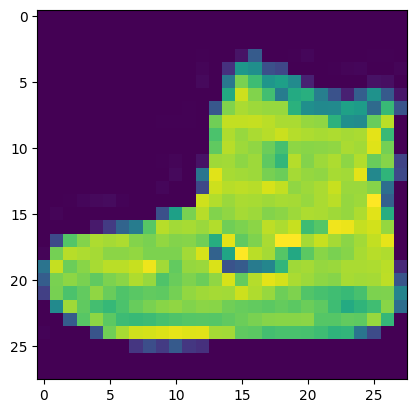

In [166]:
plt.imshow(x_train[0])

In [167]:
label_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

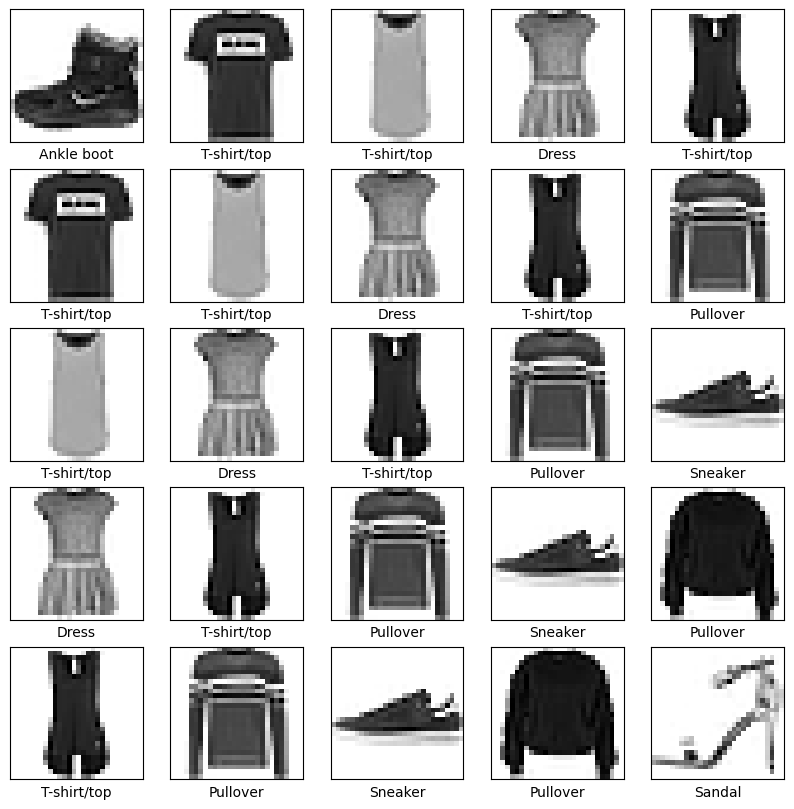

In [168]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(0,5):
  for j in range(0,5):
    axes[i,j].grid(False)
    axes[i,j].imshow(x_train[i+j],cmap='binary')
    axes[i,j].set_xlabel(label_name[y_train[i+j]])
    axes[i,j].set_xticks([])
    axes[i,j].set_yticks([])

In [169]:
x_train[1][1]

array([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
       255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
         0,   0], dtype=uint8)

In [170]:
x_train=x_train/255.0
x_test=x_test/255.0

In [171]:
x_train[1][1]

array([0.        , 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
       0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
       1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
       0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [172]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [173]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [174]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7816 - loss: 0.6205 - val_accuracy: 0.8478 - val_loss: 0.4240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8614 - loss: 0.3787 - val_accuracy: 0.8461 - val_loss: 0.4061
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8767 - loss: 0.3341 - val_accuracy: 0.8628 - val_loss: 0.3704
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8825 - loss: 0.3144 - val_accuracy: 0.8725 - val_loss: 0.3444
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8912 - loss: 0.2913 - val_accuracy: 0.8763 - val_loss: 0.3438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8950 - loss: 0.2784 - val_accuracy: 0.8787 - val_loss: 0.3389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9006 - loss: 0.2684 - val_accuracy: 0.8781 - val_loss: 0.3410
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9055 - loss: 0.25

#### Achieving 91.22% training accuracy and 88.26% validation accuracy on the MNIST dataset using a deep neural network indicates that the model has learned the underlying patterns of the training data well and generalizes reasonably to unseen data.